In [ ]:
# !pip install opencv.python

In [2]:
import cv2

In [3]:
img=cv2.imread("C:\\Users\\gagka\\Downloads\\New folder\\img1.jpg")

In [4]:
print(img)

[[[131 190 186]
  [131 191 185]
  [133 193 187]
  ...
  [121 192 175]
  [120 191 174]
  [119 190 173]]

 [[131 190 186]
  [130 192 186]
  [131 193 187]
  ...
  [121 192 175]
  [120 191 174]
  [119 190 173]]

 [[128 192 187]
  [129 193 187]
  [130 194 188]
  ...
  [120 191 174]
  [120 191 174]
  [119 190 173]]

 ...

 [[141  78 120]
  [140  77 119]
  [139  79 120]
  ...
  [ 63 163 111]
  [ 78 168 133]
  [ 90 170 153]]

 [[142  79 121]
  [141  78 120]
  [141  81 122]
  ...
  [ 57 158 106]
  [ 71 163 128]
  [ 85 165 148]]

 [[144  81 123]
  [144  81 123]
  [145  85 126]
  ...
  [ 48 152  99]
  [ 62 156 121]
  [ 75 159 141]]]


In [5]:
img.size


1800900

In [6]:
img.shape

(900, 667, 3)

In [7]:
img[1]

array([[131, 190, 186],
       [130, 192, 186],
       [131, 193, 187],
       ...,
       [121, 192, 175],
       [120, 191, 174],
       [119, 190, 173]], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

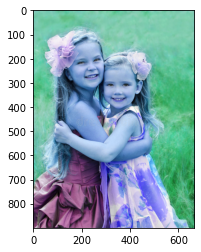

In [9]:
plt.imshow(img)

In [10]:
while True:
    cv2.imshow('result',img)
    
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [11]:
haar_data= cv2.CascadeClassifier("C:\\Users\\gagka\\Downloads\\New folder\\haar_cascade_data.txt")

In [12]:
haar_data.detectMultiScale(img)

array([[152, 148, 166, 166],
       [272, 252, 153, 153],
       [462, 598,  28,  28],
       [584, 705,  74,  74]])

In [13]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255),4)
    cv2.imshow('rest',img)
    if cv2.waitKey (2) == 27:
        break
cv2.destroyAllWindows()

In [14]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag,img =capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255),4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50,50))
        print(len(data))
        if len(data) < 200:
            data.append(face)
    cv2.imshow('rest',img)
    if cv2.waitKey (2) == 27 or len(data) >= 200:
        break
        
capture.release()
cv2.destroyAllWindows()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [15]:
import numpy as np
import cv2

In [16]:
np.save('without_mask.npy',data)

In [17]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag,img =capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255),4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50,50))
        print(len(data))
        if len(data) < 200:
            data.append(face)
    cv2.imshow('rest',img)
    if cv2.waitKey (2) == 27 or len(data) >= 200:
        break
        
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [18]:
np.save("with_mask.npy",data)

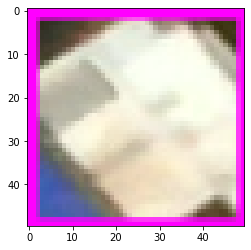

In [19]:
plt.imshow(data[60])

In [20]:
with_mask=np.load('with_mask.npy')
without_mask=np.load('without_mask.npy')

In [21]:
with_mask.shape

(200, 50, 50, 3)

In [22]:
without_mask.shape

(200, 50, 50, 3)

In [23]:
with_mask = with_mask.reshape(200, 50 * 50 * 3)
without_mask = without_mask.reshape(200, 50 * 50 *3)

In [24]:
with_mask.shape

(200, 7500)

In [25]:
X = np.r_[with_mask,without_mask]
X.shape

(400, 7500)

In [26]:
labels = np.zeros(X.shape[0])

In [27]:
labels[200:] = 1.0

In [28]:
names ={0 : 'Mask', 1 : 'No Mask'}

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.25)

In [32]:
x_train.shape

(300, 7500)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.25)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca =PCA(n_components=3)
x_train = pca.fit_transform(x_train)

In [36]:
x_train[0]

array([-746.80286962,   15.17130359, -618.90933246])

In [37]:
x_train.shape

(300, 3)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,labels, test_size = 0.25)

In [39]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [43]:
#x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.92

In [45]:
haar_data= cv2.CascadeClassifier("C:\\Users\\gagka\\Downloads\\New folder\\haar_cascade_data.txt")
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag,img =capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,255),4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50,50))
        face = face.reshape(1,-1)
        pred = svm.predict(face)[0]
        n = names[int(pred)]
        cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2)
        print(n)
    cv2.imshow('rest',img)
    if cv2.waitKey(2) == 27:
        break
        
capture.release()
cv2.destroyAllWindows()

No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
